# importing libraries

In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.models import Sequential 
import random
#from sklearn.model_selection import train_test_split
import pickle
#from IPython import display
#import time

%matplotlib inline

In [2]:
 class_index ={'man':0 , 'woman':1}

In [ ]:
list(class_index.keys())[list(class_index.values()).index(0)]

'man'

# showing number of imgs in training , testing & predict folders

In [ ]:
man_path='/content/drive/MyDrive/man'
men_imgs = os.listdir(man_path)
print(f'number of men imgs : {len(men_imgs)}')

woman_path='/content/drive/MyDrive/woman'
women_imgs = os.listdir(woman_path)
print(f'number of women imgs : {len(women_imgs)}')

number of men imgs : 10269
number of women imgs : 9486


preprocessing pipline procedure:

1- resize all imgs which have size upove & under 100x100 cm^2 to 100x100

2-give labels to data

3-save all preprocessing 

4-seperate labels from features 

5-normalize training & test data

# start with training samples
resizing them

In [ ]:
training_data = []

path='/content/drive/MyDrive/man'

for index in os.listdir(path): # go through men folder
   try:
      new_path = os.path.join(path,index) # getting path of img
      #print(new_path)
      img = mpimg.imread(new_path) #read img
      
      if img.shape!=(100,100,3):
         new_img = cv2.resize(img,(100,100)) # resize img to (150,150)
         trainig_data.append([new_img,class_index['man']]) # pushing img
      else :
         training_data.append([img,class_index['man']]) # pushing img
      if len(training_data)==2000:
         print(f'{len(training_data)} were add successfully')
         break
      else:
         print(len(training_data))
   except Exception as e:
     pass

Done uploading 2000 of men 

Now uploading 2000 women

In [ ]:

path='/content/drive/MyDrive/woman'
for index in os.listdir(path): # go through men folder
   try:
      new_path = os.path.join(path,index) # getting path of img
      #print(new_path)
      img = mpimg.imread(new_path) #read img
     
      if img.shape!=(100,100,3):
         new_img = cv2.resize(img,(100,100)) # resize img to (150,150)
         training_data.append([new_img,class_index['woman']]) # pushing img
      else :
         training_data.append([img,class_index['woman']]) # pushing img
     
      if len(training_data) ==4000: 
         print(f'now its {len(training_data)} imges')
         break
      else:
         print (len(training_data))     
 
   except Exception as e:
     pass

Now we have 4000 sample for training

We will separate feature from labels

But first shuffle the imgs

# changing the order 
Of imgs in array

In [ ]:
random.shuffle(training_data)
for sample in training_data[:20]:
    print(sample[1])

# plotting some random imgs

In [ ]:
plt.figure(figsize=(10,10))#10 cm* 10 cm
for i in range(25): #25 image
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    indx = random.randint(0,len(training_data))
    plt.imshow(training_data[indx][0])
    name = training_data[indx][1]
    plt.xlabel(list(class_index.keys())[list(class_index.values()).index(name)])

# separate features from labels

In [ ]:
X_train=[]
y_train=[]

for feature,label in training_data:
    X_train.append(feature)
    y_train.append(label)

X_train= np.array(X_train).reshape(-1,100,100,3)
y_train= np.array(y_train).reshape(-1,1)

In [ ]:
print(X_train.shape)
print(y_train.shape)

Saving preprocessing data

In [ ]:
pickle_out=open('/content/drive/MyDrive/X_train','wb')
pickle.dump(X_train,pickle_out)
pickle_out.close()

pickle_out=open('/content/drive/MyDrive/y_train','wb')
pickle.dump(y_train,pickle_out)
pickle_out.close()

In [3]:
pickle_in=open('/content/drive/MyDrive/X_train','rb')
X_train=pickle.load(pickle_in)

pickle_in=open('/content/drive/MyDrive/y_train','rb')
y_train=pickle.load(pickle_in)

In [4]:
X_train.shape

(4000, 100, 100, 3)

# Time for taking 2000 sample for testing

In [ ]:
testing_data = []

path='/content/drive/MyDrive/man'
sub_imgs = os.listdir(path)
sub_imgs =sub_imgs[2100:3100]

for index in sub_imgs: # go through men folder
   try:
      new_path = os.path.join(path,index) # getting path of img
      #print(new_path)
      img = mpimg.imread(new_path) #read img
      
      if img.shape!=(100,100,3):
         new_img = cv2.resize(img,(100,100)) # resize img to (150,150)
         testing_data.append([new_img,class_index['man']]) # pushing img
      else :
         testing_data.append([img,class_index['man']]) # pushing img
      print (len(tsting_data))
   except Exception as e:
     pass

print(f'{len(testing_data)} were add successfully')

Done uploading 1000 of men 

Now uploading 1000 women

In [ ]:
path='/content/drive/MyDrive/woman'
sub_imgs = os.listdir(path)
sub_imgs =sub_imgs[2100:3100]

for index in sub_imgs: # go through men folder
   try:
      new_path = os.path.join(path,index) # getting path of img
      #print(new_path)
      img = mpimg.imread(new_path) #read img
     
      if img.shape!=(100,100,3):
         new_img = cv2.resize(img,(100,100)) # resize img to (150,150)
         testing_data.append([new_img,class_index['woman']]) # pushing img
      else :
         testing_data.append([img,class_index['woman']]) # pushing img
     
      print (len(testing_data))     

   except Exception as e:
     pass

# Shuffling imgs

In [ ]:
random.shuffle(testing_data)
for sample in testing_data[:20]:
    print(sample[1])

# Plotting some random imgs

In [ ]:
plt.figure(figsize=(10,10))#10 cm* 10 cm
for i in range(25): #25 image
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    indx = random.randint(0,len(testing_data))
    plt.imshow(testing_data[indx][0])
    name = testing_data[indx][1]
    plt.xlabel(list(class_index.keys())[list(class_index.values()).index(name)])

# Separate the imgs to X_test & y_test

In [ ]:
X_test=[]
y_test=[]

for feature,label in testing_data:
    X_test.append(feature)
    y_test.append(label)

X_test= np.array(X_test).reshape(-1,100,100,3)
y_test= np.array(y_test).reshape(-1,1)

In [ ]:
print(X_test.shape)
print(y_test.shape)

saving test_data

In [ ]:
pickle_out=open('/content/drive/MyDrive/X_test','wb')
pickle.dump(X_test,pickle_out)
pickle_out.close()

pickle_out=open('/content/drive/MyDrive/y_test','wb')
pickle.dump(y_test,pickle_out)
pickle_out.close()

In [5]:
pickle_in=open('/content/drive/MyDrive/X_test','rb')
X_test=pickle.load(pickle_in)

pickle_in=open('/content/drive/MyDrive/y_test','rb')
y_test=pickle.load(pickle_in)

In [6]:
X_test.shape

(2000, 100, 100, 3)

# time for 1000 imges for predict

In [ ]:
predict_data = []

path='/content/drive/MyDrive/man'
sub_imgs = os.listdir(path)
sub_imgs =sub_imgs[4000:4500]
for index in sub_imgs: # go through men folder
   try:
      new_path = os.path.join(path,index) # getting path of img
      #print(new_path)
      img = mpimg.imread(new_path) #read img
      
      if img.shape!=(100,100,3):
         new_img = cv2.resize(img,(100,100)) # resize img to (150,150)
         predict_data.append([new_img,class_index['man']]) # pushing img
      else :
         predict_data.append([img,class_index['man']]) # pushing img
 
      print(len(predict_data))
   except Exception as e:
     pass

done uploading 500 men imges for predictions

now 500 for women

In [ ]:
path='/content/drive/MyDrive/woman'
sub_imgs = os.listdir(path)
sub_imgs =sub_imgs[4000:4500]
for index in sub_imgs: # go through men folder
   try:
      new_path = os.path.join(path,index) # getting path of img
      #print(new_path)
      img = mpimg.imread(new_path) #read img
      
      if img.shape!=(100,100,3):
         new_img = cv2.resize(img,(100,100)) # resize img to (150,150)
         predict_data.append([new_img,class_index['woman']]) # pushing img
      else :
         predict_data.append([img,class_index['woman']]) # pushing img

      print(len(predict_data))
   except Exception as e:
     pass

now we have down with 1000 imgs for predictions

# shuffling imges

In [ ]:
random.shuffle(predict_data)
for sample in predict_data[:20]:
    print(sample[1])

# ploting imges

In [ ]:
plt.figure(figsize=(10,10))#10 cm* 10 cm
for i in range(25): #25 image
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    indx = random.randint(0,len(predict_data))
    plt.imshow(predict_data[indx][0])
    name = predict_data[indx][1]
    plt.xlabel(list(class_index.keys())[list(class_index.values()).index(name)])

# seperate features from labels

In [ ]:
X_predict =[]
y_predict = []

for feature , label in predict_data:
    X_predict.append(feature)
    y_predict.append(label)

X_predict=np.array(X_predict).reshape(-1,100,100,3)
y_predict=np.array(y_predict).reshape(-1,1)

In [ ]:
print(X_predict.shape)
print(y_predict.shape)

saveing time

In [ ]:
pickle_out=open('/content/drive/MyDrive/X_predict','wb')
pickle.dump(X_predict,pickle_out)
pickle_out.close()

pickle_out=open('/content/drive/MyDrive/y_predict','wb')
pickle.dump(y_predict,pickle_out)
pickle_out.close()

In [7]:
pickle_in=open('/content/drive/MyDrive/X_predict','rb')
X_predict=pickle.load(pickle_in)

pickle_in=open('/content/drive/MyDrive/y_predict','rb')
y_predict=pickle.load(pickle_in)

In [8]:
X_predict.shape

(1000, 100, 100, 3)

# building model

In [9]:
model=Sequential([
Conv2D(200,(3,3),activation='relu',input_shape=(100,100,3)),
MaxPooling2D((2,2)),

Conv2D(150,(3,3),activation='relu'),
MaxPooling2D((2,2)),

Conv2D(120,(3,3),activation='relu'),

Flatten(),
Dense(100,activation='relu'),
Dense(50,activation='relu'),Dropout(rate=0.25),
Dense(2,activation='softmax'),
])

In [10]:

from tensorflow.keras.optimizers import RMSprop

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.001), 
              metrics=['accuracy'])

In [11]:
model.fit(X_train,y_train,epochs =20,validation_data=(X_test,y_test),batch_size=128,verbose=1)

Epoch 1/20
32/32 [==============================] - 611s 19s/step - loss: 3.6776 - accuracy: 0.5452 - val_loss: 31.6501 - val_accuracy: 0.5105
Epoch 2/20
32/32 [==============================] - 609s 19s/step - loss: 0.4187 - accuracy: 0.8008 - val_loss: 49.8532 - val_accuracy: 0.8375
Epoch 3/20
32/32 [==============================] - 612s 19s/step - loss: 0.5103 - accuracy: 0.8382 - val_loss: 68.0396 - val_accuracy: 0.5410
Epoch 4/20
32/32 [==============================] - 619s 19s/step - loss: 0.4006 - accuracy: 0.8422 - val_loss: 46.4112 - val_accuracy: 0.8380
Epoch 5/20
32/32 [==============================] - 608s 19s/step - loss: 0.3040 - accuracy: 0.8702 - val_loss: 26.2948 - val_accuracy: 0.8380
Epoch 6/20
32/32 [==============================] - 615s 19s/step - loss: 0.5368 - accuracy: 0.8185 - val_loss: 73.5411 - val_accuracy: 0.8380
Epoch 7/20
32/32 [==============================] - 614s 19s/step - loss: 0.2952 - accuracy: 0.8702 - val_loss: 67.6783 - val_accuracy: 0.8380

In [12]:
loss,acc=model.evaluate(X_test,y_test)
print(f'accuracy = {acc}')
print(f'loss = {loss}')

63/63 [==============================] - 81s 1s/step - loss: 173.8409 - accuracy: 0.8490
accuracy = 0.8489999771118164
loss = 173.84092712402344


Saving model

In [14]:
model.save('/content/drive/MyDrive/my_model')

Loading model

In [15]:
from tensorflow import keras

# Load the saved model from disk
model = keras.models.load_model('/content/drive/MyDrive/my_model')

# prediction

In [16]:
predictions=model.predict(X_predict)

32/32 [==============================] - 39s 1s/step


See how many samples were wrongly predicted from test

In [ ]:

c=0
for I in range(1000):
    if np.argmax(predictions[I])!=y_predict[I]:
         print(I)
         c+=1

print(f'total number of faild prediction : {c}' )

# plotting some of predictions

In [ ]:
def plot_img (i,predictions_array,true_lbl,img):
    predictions_array,true_lbl,img=predictions_array[i],true_lbl[i][0],img[i]
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)
    prediction_lbl=np.argmax(predictions_array)
    if prediction_lbl == true_lbl:
       color='blue'
    else:
       color='red'

    detected=list(class_index.keys())[list(class_index.values()).index(prediction_lbl)]
    actual=list(class_index.keys())[list(class_index.values()).index(true_lbl)]

    plt.xlabel('{} {:2.0f}% {}'.format(detected,100*np.max(predictions_array),actual),color=color)

In [ ]:
def plot_value (i,predictions_array,true_lbl):
    predictions_array,true_lbl=predictions_array[i],true_lbl[i][0]
    plt.xticks([])
    plt.yticks([])
    thisplot=plt.bar(range(2),predictions_array,color='#777777')
    plt.ylim([0,1])
    prediction_lbl=np.argmax(predictions_array)
    thisplot[prediction_lbl].set_color('red')
    thisplot[true_lbl].set_color('blue')
    str=f'predicted = {np.argmax(predictions_array)} true = {true_lbl}'
    plt.xlabel(str)

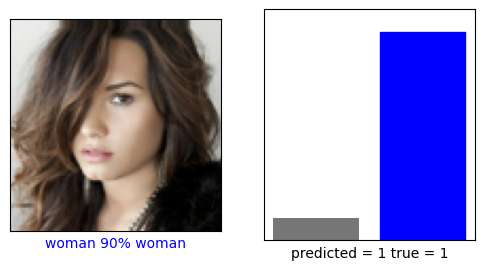

In [ ]:
i=5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_img(i,predictions,y_predict,X_predict)
plt.subplot(1,2,2)
plot_value(i,predictions,y_predict)
plt.show()